In [1]:
# import the required packages
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
downloads_path = str(Path.home() / "Downloads")
df = pd.read_excel(downloads_path + '/Prem_Data.xlsx')

In [3]:
# format the dataframe which contains the stats for each player
perf_stats = df[[x for x in list(df.columns) if str(x).count('Performance') > 0 or str(x).count('Expected') > 0]]
perf_stats.columns = perf_stats.iloc[0]
perf_stats = perf_stats.iloc[1:,:]
perf_stats.insert(0,'Player',df.iloc[1:,1])
perf_stats.insert(1,'Squad',df.iloc[1:,4])
perf_stats.head()

,Player,Squad,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG
1,Brenden Aaronson,Leeds United,1,2,3,1,0,0,2,0,2.9,2.9,3.7,6.6
2,Che Adams,Southampton,5,3,8,5,0,0,1,0,5.9,5.9,2.8,8.7
3,Tyler Adams,Leeds United,0,0,0,0,0,0,6,1,0.1,0.1,1.4,1.5
4,Tosin Adarabioyo,Fulham,1,0,1,1,0,0,2,0,0.2,0.2,0,0.2
5,Nayef Aguerd,West Ham,0,0,0,0,0,0,3,0,1.2,1.2,0.1,1.3


In [4]:
#create a dictionary mapping each team to a color
colors = ['#FFCD00','#D71920','#CC0000','#7A263A','#A7A5A6',
          '#FDB913','#e30613','#6CABDD','#003090','#00B2A9','#003399','#241F20',
          '#B50E12','#DA291C','#95BFE5','#034694','#e53233','#132257','#0057B8','#EF0107']
col_dict = dict(zip(list(df['Unnamed: 4'].unique())[1:],colors))

In [5]:
# create a column denoting the color
perf_stats['col'] = perf_stats['Squad'].map(col_dict)

In [6]:
# create a column to determine the difference between non penalty goals and non penalty xG
perf_stats['ex_v_real'] = perf_stats['G-PK'] - perf_stats.npxG

In [7]:
# create a table with just the first letter of the player's first name and their last name
perf_stats['Player_abrv'] = [x.split(' ')[0][0] + '. ' + x.split(' ')[1] if x.count(' ') > 0 else x for x in perf_stats.Player]

In [8]:
# extract the best and worst 8 players by their goals and xG difference
perf_ex = perf_stats.sort_values(by = 'ex_v_real',ascending = 0).head(8)
bad_ex = perf_stats.sort_values(by = 'ex_v_real',ascending = 1).head(8)

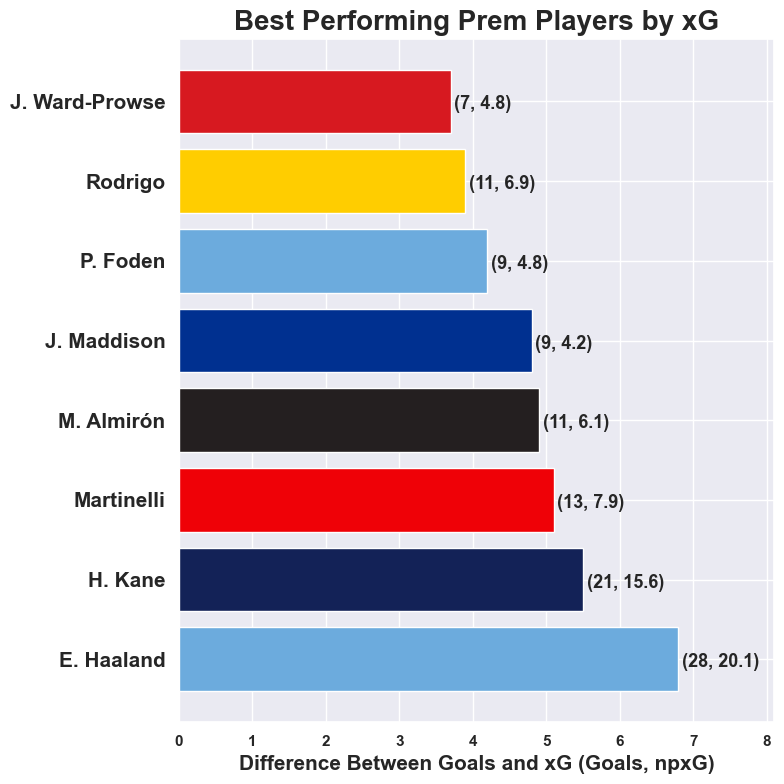

In [9]:
# create the plot for best performing players
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
ax.barh(perf_ex['Player_abrv'],perf_ex['ex_v_real'],color = perf_ex['col'])
plt.xlabel('Difference Between Goals and xG (Goals, npxG)',fontsize = 15,weight = 'bold')
plt.title('Best Performing Prem Players by xG',fontsize = 20,weight='bold')
# ax.invert_xaxis()
for i in range(perf_ex.shape[0]):
    plt.text(s = '(%d, %.1f)' % (perf_ex.iloc[i].Gls,perf_ex.iloc[i].xG),y = i - .1,x =perf_ex.iloc[i].ex_v_real +.05,fontdict={'fontsize':13},weight = 'bold')
plt.xlim(0,perf_ex.ex_v_real.max()+1.3)
plt.yticks(fontsize=15,weight='bold')
plt.scatter(-3,1)
plt.xticks(weight = 'bold')
fig.tight_layout()

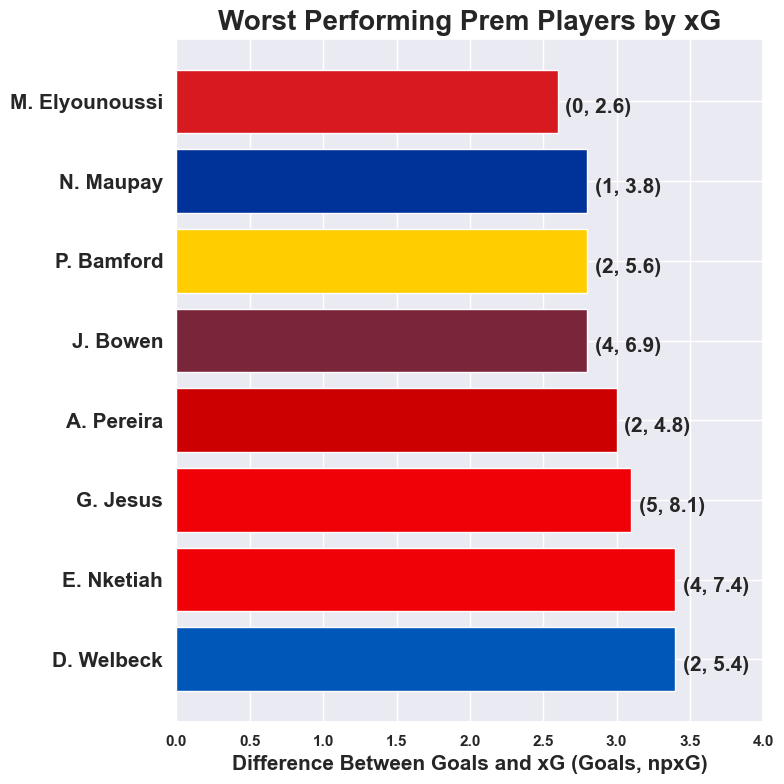

In [10]:
# create the plot for worst performing players
sns.set()
fig,ax = plt.subplots(figsize = (8,8))
ax.barh(bad_ex['Player_abrv'],-bad_ex['ex_v_real'],color = bad_ex['col'])
plt.xlabel('Difference Between Goals and xG (Goals, npxG)',fontsize = 15,weight = 'bold')
plt.title('Worst Performing Prem Players by xG',fontsize = 20,weight='bold')
for i in range(bad_ex.shape[0]):
    plt.text(s = '(%d, %.1f)' % (bad_ex.iloc[i].Gls,bad_ex.iloc[i].xG),y = i - .15,x =-bad_ex.iloc[i].ex_v_real +.05,fontdict={'fontsize':15},weight = 'bold')
plt.xlim(0,-bad_ex.ex_v_real.min()+.6)
plt.yticks(fontsize=15,weight='bold')
plt.scatter(-3,1)
plt.xticks(weight = 'bold')
fig.tight_layout()